In [182]:
!pip install keras

In [183]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout
from keras import backend as k


In [184]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [185]:
print('train_datset shape: ',x_train.shape,y_train.shape)
print('test_datset shape: ',x_test.shape,y_test.shape)

train_datset shape:  (60000, 28, 28) (60000,)
test_datset shape:  (10000, 28, 28) (10000,)


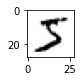

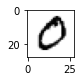

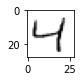

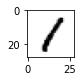

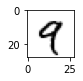

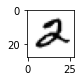

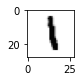

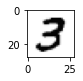

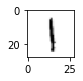

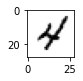

In [186]:
for i in range(10):
  import matplotlib.pyplot as plt
  plt.subplot(411)
  plt.imshow(x_train[i],cmap=plt.get_cmap('Greys'))
  plt.show()


In [187]:
img_rows,img_cols=28,28
if k.image_data_format=='channels_first':
  x_train=x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test=x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
  inpx=(1,img_rows,img_cols)
else:
  x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols)
  x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols)
  inpx=(img_rows,img_cols,1)

In [188]:
# convert integer to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [189]:
#normalization to 0 to 1
x_train/=255
x_test/=255
print(x_train.shape)
y_train.shape


(60000, 28, 28)


(60000,)

In [190]:
#convert categorical data into dummy
import keras
y_train =keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [191]:
# to define Cnn
inpx=Input(shape=inpx)
layer1=Conv2D(32,(3,3),activation='relu')(inpx)
layer2=Conv2D(64,(3,3),activation='relu')(layer1)
layer3=MaxPooling2D(pool_size=(2,2))(layer2)
#to avoid overfitting
layer4=Dropout(0.5)(layer3)
layer5=Flatten()(layer4)
layer6=Dense(250,activation='sigmoid')(layer5)
layer7=Dense(10,activation='softmax')(layer6)



In [193]:
model=Model([inpx],layer7)
model.compile(optimizer='Adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=50,epochs=15)

Epoch 1/15
1200/1200 [==============================] - 5s 4ms/step - loss: 2.2932 - accuracy: 0.1135
Epoch 2/15
1200/1200 [==============================] - 5s 4ms/step - loss: 2.1405 - accuracy: 0.3946
Epoch 3/15
1200/1200 [==============================] - 5s 4ms/step - loss: 2.0046 - accuracy: 0.5916
Epoch 4/15
1200/1200 [==============================] - 5s 4ms/step - loss: 1.8413 - accuracy: 0.6453
Epoch 5/15
1200/1200 [==============================] - 5s 4ms/step - loss: 1.6236 - accuracy: 0.7051
Epoch 6/15
1200/1200 [==============================] - 5s 4ms/step - loss: 1.3693 - accuracy: 0.7438
Epoch 7/15
1200/1200 [==============================] - 5s 4ms/step - loss: 1.1374 - accuracy: 0.7678
Epoch 8/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.9608 - accuracy: 0.7906
Epoch 9/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.8375 - accuracy: 0.8070
Epoch 10/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.748

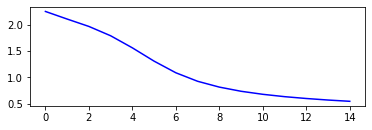

In [194]:

import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['loss'],color='blue')
plt.show()

In [195]:
score=model.evaluate(x_test,y_test)
print('Loss:',score[0])
print('Accuracy: ',score[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.4678 - accuracy: 0.8787
Loss: 0.4678042531013489
Accuracy:  0.8787000179290771


In [196]:
prediction=model.predict(x_test)
print(np.argmax(np.round(prediction[1])))


2


7


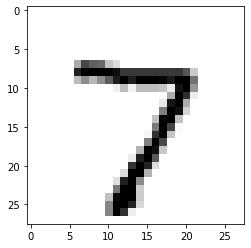

2


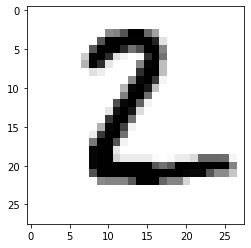

1


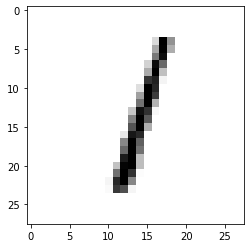

0


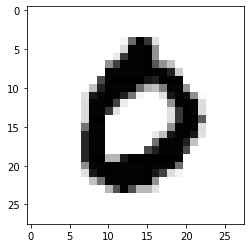

4


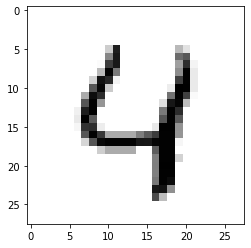

In [197]:
for i in range(5):
  plt.imshow(x_test[i].reshape(28,28),cmap=plt.cm.binary)
  print(np.argmax(np.round(prediction[i])))
  plt.show()

**Fashion Dataset **